In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from pandas import Timestamp
import string
import re
from nltk.corpus import stopwords
from nltk import word_tokenize
STOPWORDS = set(stopwords.words('english'))
from bs4 import BeautifulSoup

from IPython.core.interactiveshell import InteractiveShell


In [2]:
df = pd.read_csv('lock.csv')
df.shape
df.head()

,Unnamed: 0,tweets,proc_tweets,sentiment_compound_polarity,sentiment_neutral,sentiment_pos,sentiment_negative,sentiment
0,4/9/2020 16:31,b'RT @BTsipa: Doing nightshift \xf0\x9f\x98\xa...,NaN,NaN,NaN,NaN,NaN,NaN
1,4/9/2020 16:30,"b""RT @JustinaBenson10: Madam couldn't take it ...",NaN,NaN,NaN,NaN,NaN,NaN
2,4/9/2020 16:30,b'RT @Mfundoyakhe_S: As the wife was going thr...,NaN,NaN,NaN,NaN,NaN,NaN
3,4/9/2020 16:30,"b""RT @MberiTakudzw: Pallo's work \xe2\x9c\x8c\...",NaN,NaN,NaN,NaN,NaN,NaN
4,4/9/2020 16:30,"b'""We do as he commands""\n#HumanityIsNotAVirus...",NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
print(df.tweets[500])

b'RT @99acresIndia: #RealEstateNews | Private equity investment in #RealEstate to decline in 2020 due to #Coronavirus pandemic! Read more: ht\xe2\x80\xa6'


In [4]:
df = pd.read_csv('lock.csv')

In [5]:
print(df.tweets[500])

b'RT @99acresIndia: #RealEstateNews | Private equity investment in #RealEstate to decline in 2020 due to #Coronavirus pandemic! Read more: ht\xe2\x80\xa6'


In [6]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt

In [7]:
df["proc_tweets"] = np.vectorize(remove_pattern)(df["tweets"], "@[\w]*")

df["proc_tweets"] = np.vectorize(remove_pattern)(df["tweets"], "#[\w+]*")
#df["proc_tweet"] = np.vectorize(remove_pattern)(df["tweet"], "d[\w+]*")
df['proc_tweets'] = df['proc_tweets'].str.replace("[^a-zA-Z#]", " ")

df['proc_tweets'] = df['proc_tweets'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [8]:
print(df.proc_tweets[500])

acresIndia Private equity investment decline pandemic Read more


In [9]:
print(df.proc_tweets[500])

acresIndia Private equity investment decline pandemic Read more


In [10]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *

from nltk import tokenize

In [11]:

import nltk

In [12]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\SRI\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [13]:
sid = SentimentIntensityAnalyzer()

In [14]:
df['sentiment_compound_polarity']=df.tweets.apply(lambda x:sid.polarity_scores(x)['compound'])
df['sentiment_neutral']=df.tweets.apply(lambda x:sid.polarity_scores(x)['neu'])
df['sentiment_negative']=df.tweets.apply(lambda x:sid.polarity_scores(x)['neg'])
df['sentiment_pos']=df.tweets.apply(lambda x:sid.polarity_scores(x)['pos'])

In [15]:
df.head(5)

,Unnamed: 0,tweets,proc_tweets,sentiment_compound_polarity,sentiment_neutral,sentiment_pos,sentiment_negative,sentiment
0,4/9/2020 16:31,b'RT @BTsipa: Doing nightshift \xf0\x9f\x98\xa...,BTsipa Doing nightshift https UtNU,0.0000,1.000,0.000,0.000,NaN
1,4/9/2020 16:30,"b""RT @JustinaBenson10: Madam couldn't take it ...",JustinaBenson Madam couldn take again Nigerian...,-0.5267,0.833,0.000,0.167,NaN
2,4/9/2020 16:30,b'RT @Mfundoyakhe_S: As the wife was going thr...,Mfundoyakhe wife going through chemotherapy se...,-0.0772,0.676,0.139,0.185,NaN
3,4/9/2020 16:30,"b""RT @MberiTakudzw: Pallo's work \xe2\x9c\x8c\...",MberiTakudzw Pallo work based Capetown also tr...,0.0000,1.000,0.000,0.000,NaN
4,4/9/2020 16:30,"b'""We do as he commands""\n#HumanityIsNotAVirus...",commands https kHuCrc,0.0000,1.000,0.000,0.000,NaN


In [16]:
df['sentiment']=''
df.loc[df.sentiment_compound_polarity>0,'sentiment']='POSITIVE'
df.loc[df.sentiment_compound_polarity==0,'sentiment']='NEUTRAL'
df.loc[df.sentiment_compound_polarity<0,'sentiment']='NEGATIVE'
df.head()

,Unnamed: 0,tweets,proc_tweets,sentiment_compound_polarity,sentiment_neutral,sentiment_pos,sentiment_negative,sentiment
0,4/9/2020 16:31,b'RT @BTsipa: Doing nightshift \xf0\x9f\x98\xa...,BTsipa Doing nightshift https UtNU,0.0000,1.000,0.000,0.000,NEUTRAL
1,4/9/2020 16:30,"b""RT @JustinaBenson10: Madam couldn't take it ...",JustinaBenson Madam couldn take again Nigerian...,-0.5267,0.833,0.000,0.167,NEGATIVE
2,4/9/2020 16:30,b'RT @Mfundoyakhe_S: As the wife was going thr...,Mfundoyakhe wife going through chemotherapy se...,-0.0772,0.676,0.139,0.185,NEGATIVE
3,4/9/2020 16:30,"b""RT @MberiTakudzw: Pallo's work \xe2\x9c\x8c\...",MberiTakudzw Pallo work based Capetown also tr...,0.0000,1.000,0.000,0.000,NEUTRAL
4,4/9/2020 16:30,"b'""We do as he commands""\n#HumanityIsNotAVirus...",commands https kHuCrc,0.0000,1.000,0.000,0.000,NEUTRAL


In [17]:
df.columns

Index(['Unnamed: 0', 'tweets', 'proc_tweets', 'sentiment_compound_polarity',
       'sentiment_neutral', 'sentiment_pos', 'sentiment_negative',
       'sentiment'],
      dtype='object')

In [18]:
df.shape
## 8 - heading in the csv file 33383 tweets

(33383, 8)

In [19]:
df.sentiment.value_counts()          ### no. of tweets in each class

POSITIVE    12713
NEGATIVE    10477
NEUTRAL     10193
Name: sentiment, dtype: int64

In [20]:
df.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33383 entries, 0 to 33382
Data columns (total 8 columns):
Unnamed: 0                     33383 non-null object
tweets                         33383 non-null object
proc_tweets                    33383 non-null object
sentiment_compound_polarity    33383 non-null float64
sentiment_neutral              33383 non-null float64
sentiment_pos                  33383 non-null float64
sentiment_negative             33383 non-null float64
sentiment                      33383 non-null object
dtypes: float64(4), object(4)
memory usage: 2.0+ MB


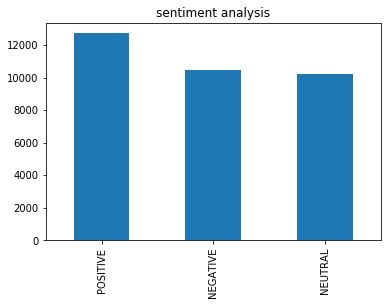

In [21]:
df.sentiment.value_counts().plot(kind='bar',title="sentiment analysis")

In [27]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from pandas import Timestamp
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
import re
from nltk.corpus import stopwords
from nltk import word_tokenize
STOPWORDS = set(stopwords.words('english'))
from bs4 import BeautifulSoup

from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = 'all'



In [29]:
MAX_NB_WORDS = 100
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 70
# This is fixed.
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~')###,lower=True)
tokenizer.fit_on_texts(df['proc_tweets'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 27072 unique tokens.


In [30]:
X = tokenizer.texts_to_sequences(df['proc_tweets'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)

###
print(MAX_SEQUENCE_LENGTH)
df.shape
X.shape

###
print('Shape of data tensor:', X.shape)

70


(33383, 8)

(33383, 70)

Shape of data tensor: (33383, 70)


In [31]:

Y = pd.get_dummies (df['sentiment']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (33383, 3)


In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(30044, 70) (30044, 3)
(3339, 70) (3339, 3)


In [33]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(110, dropout=0.5, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer='RMSProp', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 70, 100)           10000     
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 70, 100)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 110)               92840     
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 333       
Total params: 103,173
Trainable params: 103,173
Non-trainable params: 0
_________________________________________________________________
None


In [34]:
#epochs = 10
#batch_size = 50
epochs = 8
batch_size = 32
history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.01,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

C:\Users\SRI\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
C:\Users\SRI\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 29743 samples, validate on 301 samples
Epoch 1/8
29743/29743 [==============================] - 134s 5ms/step - loss: 0.6945 - accuracy: 0.6843 - val_loss: 0.6226 - val_accuracy: 0.7442
Epoch 2/8
29743/29743 [==============================] - 126s 4ms/step - loss: 0.6379 - accuracy: 0.7112 - val_loss: 0.5979 - val_accuracy: 0.7508
Epoch 3/8
29743/29743 [==============================] - 125s 4ms/step - loss: 0.6201 - accuracy: 0.7210 - val_loss: 0.5865 - val_accuracy: 0.7508
Epoch 4/8
29743/29743 [==============================] - 126s 4ms/step - loss: 0.6022 - accuracy: 0.7298 - val_loss: 0.5818 - val_accuracy: 0.7409
Epoch 5/8
29743/29743 [==============================] - 123s 4ms/step - loss: 0.5890 - accuracy: 0.7331 - val_loss: 0.5704 - val_accuracy: 0.7475
Epoch 6/8
29743/29743 [==============================] - 124s 4ms/step - loss: 0.5797 - accuracy: 0.7439 - val_loss: 0.5607 - val_accuracy: 0.7542
Epoch 7/8
29743/29743 [==============================] - 122s 4ms/step

In [42]:
from sklearn.metrics import classification_report

acc = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.10f}'.format(accr[0]*100,accr[1]*100))
pred = model.predict(X_test, batch_size=32, verbose=1)
predicted = np.argmax(pred, axis=1)
report = classification_report(np.argmax(Y_test, axis=1), predicted)
print(report)

3339/3339 [==============================] - 3s 980us/step
Test set
  Loss: 58.635
  Accuracy: 73.7645983696
3339/3339 [==============================] - 3s 969us/step
              precision    recall  f1-score   support

           0       0.87      0.68      0.77      1046
           1       0.61      0.82      0.70      1000
           2       0.80      0.72      0.76      1293

    accuracy                           0.74      3339
   macro avg       0.76      0.74      0.74      3339
weighted avg       0.76      0.74      0.74      3339



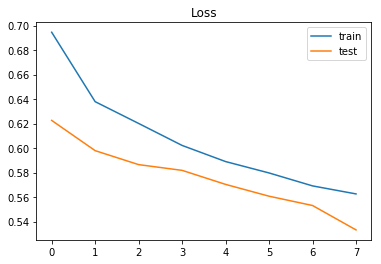

In [43]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

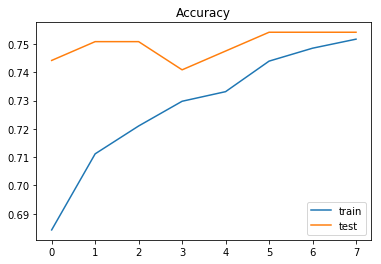

In [45]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();